In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [218]:
trainData = pd.read_csv("dataset/my_features.csv")
data_cols = np.array(trainData.columns)
data_cols

array(['letter_slant', 'line_slant', 'letter_size', 'margin_slope',
       'word_spacing', 'personality'], dtype=object)

In [219]:
trainData.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,backward,upperside,1307.2,straight,small,Agreeableness
1,backward,upperside,932.0,right,small,Agreeableness
2,forward,upperside,891.4,straight,small,Agreeableness
3,forward,upperside,279.6,straight,small,Agreeableness
4,vertical,upperside,766.0,straight,small,Agreeableness


In [220]:
letter_slant_mapping = {'backward': -1, 'forward': 1, 'vertical': 0}
line_slant_mapping = {'lowerside': -1, 'baseline': 0, 'upperside': 1}
margin_slope_mapping = {'left': -1, 'straight': 0, 'right': 1}
word_spacing_mapping = {'small': -1, 'medium': 0, 'large': 1}

In [221]:
trainData["letter_slant"] = trainData["letter_slant"].map(letter_slant_mapping)
trainData["line_slant"] = trainData["line_slant"].map(line_slant_mapping)
trainData["margin_slope"] = trainData["margin_slope"].map(margin_slope_mapping)
trainData["word_spacing"] = trainData["word_spacing"].map(word_spacing_mapping)

In [222]:
trainData.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,-1,1,1307.2,0,-1,Agreeableness
1,-1,1,932.0,1,-1,Agreeableness
2,1,1,891.4,0,-1,Agreeableness
3,1,1,279.6,0,-1,Agreeableness
4,0,1,766.0,0,-1,Agreeableness


In [223]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    int64  
 1   line_slant    221 non-null    int64  
 2   letter_size   221 non-null    float64
 3   margin_slope  221 non-null    int64  
 4   word_spacing  221 non-null    int64  
 5   personality   221 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 10.5+ KB


In [224]:
trainData.isnull().sum()

letter_slant    0
line_slant      0
letter_size     0
margin_slope    0
word_spacing    0
personality     0
dtype: int64

In [225]:
trainData = trainData.dropna(axis=0)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    int64  
 1   line_slant    221 non-null    int64  
 2   letter_size   221 non-null    float64
 3   margin_slope  221 non-null    int64  
 4   word_spacing  221 non-null    int64  
 5   personality   221 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 10.5+ KB


In [226]:
aggreableness_data = trainData[trainData["personality"] == "Agreeableness"]
conscientiousness_data = trainData[trainData["personality"] == "Conscientiousness"]
extraversion_data = trainData[trainData["personality"] == "Extraversion"]
neuroticism_data = trainData[trainData["personality"] == "Neuroticism"]
openness_data = trainData[trainData["personality"] == "Openness"]


In [227]:
aggreableness_x = aggreableness_data.drop(data_cols[-1], axis=1)
aggreableness_y = aggreableness_data[data_cols[-1]]

conscientiousness_x = conscientiousness_data.drop(data_cols[-1], axis=1)
conscientiousness_y = conscientiousness_data[data_cols[-1]]

extraversion_x = extraversion_data.drop(data_cols[-1], axis=1)
extraversion_y = extraversion_data[data_cols[-1]]

neuroticism_x = neuroticism_data.drop(data_cols[-1], axis=1)
neuroticism_y = neuroticism_data[data_cols[-1]]

openness_x = openness_data.drop(data_cols[-1], axis=1)
openness_y = openness_data[data_cols[-1]]

In [228]:
test_ratio = 0.1

aggreableness_x_train, aggreableness_x_test, aggreableness_y_train, aggreableness_y_test = train_test_split(aggreableness_x, aggreableness_y, test_size=test_ratio, shuffle=True)

conscientiousness_x_train, conscientiousness_x_test, conscientiousness_y_train, conscientiousness_y_test = train_test_split(conscientiousness_x, conscientiousness_y, test_size=test_ratio, shuffle=True)

extraversion_x_train, extraversion_x_test, extraversion_y_train, extraversion_y_test = train_test_split(extraversion_x, extraversion_y, test_size=test_ratio, shuffle=True)

neuroticism_x_train, neuroticism_x_test, neuroticism_y_train, neuroticism_y_test = train_test_split(neuroticism_x, neuroticism_y, test_size=test_ratio, shuffle=True)

openness_x_train, openness_x_test, openness_y_train, openness_y_test = train_test_split(openness_x, openness_y, test_size=test_ratio, shuffle=True)

x_train = pd.concat([aggreableness_x_train, conscientiousness_x_train, extraversion_x_train, neuroticism_x_train, openness_x_train], ignore_index=True)
y_train = pd.concat([aggreableness_y_train, conscientiousness_y_train, extraversion_y_train, neuroticism_y_train, openness_y_train], ignore_index=True)

x_test = pd.concat([aggreableness_x_test, conscientiousness_x_test, extraversion_x_test, neuroticism_x_test, openness_x_test], ignore_index=True)
y_test = pd.concat([aggreableness_y_test, conscientiousness_y_test, extraversion_y_test, neuroticism_y_test, openness_y_test], ignore_index=True)

In [229]:
print(f"{x_train.__len__(), x_test.__len__()}")
print(f"Aggreableness: {aggreableness_x.__len__(), aggreableness_x_train.__len__(), aggreableness_x_test.__len__()}")
print(f"Conscientiousness: {conscientiousness_x.__len__(), conscientiousness_x_train.__len__(), conscientiousness_x_test.__len__()}")
print(f"Extraversion: {extraversion_x.__len__(), extraversion_x_train.__len__(), extraversion_x_test.__len__()}")
print(f"Neuroticism: {neuroticism_x.__len__(), neuroticism_x_train.__len__(), neuroticism_x_test.__len__()}")
print(f"Openness: {openness_x.__len__(), openness_x_train.__len__(), openness_x_test.__len__()}")

(197, 24)
Aggreableness: (38, 34, 4)
Conscientiousness: (35, 31, 4)
Extraversion: (10, 9, 1)
Neuroticism: (44, 39, 5)
Openness: (94, 84, 10)


In [230]:
rf = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)
rf_res = rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
print(y_pred)

['Conscientiousness' 'Agreeableness' 'Openness' 'Agreeableness'
 'Neuroticism' 'Agreeableness' 'Conscientiousness' 'Agreeableness'
 'Neuroticism' 'Neuroticism' 'Openness' 'Agreeableness' 'Openness'
 'Neuroticism' 'Conscientiousness' 'Openness' 'Conscientiousness'
 'Openness' 'Openness' 'Openness' 'Neuroticism' 'Openness' 'Openness'
 'Openness']


In [231]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5

In [232]:
import joblib
import os
joblib.dump(rf, "./saved_models/random_forest.joblib", compress=3)
print(f"Saved model size: {np.round(os.path.getsize('./saved_models/random_forest.joblib') / 1024 / 1024, 2) } MB")

Saved model size: 0.27 MB


In [233]:
rf.feature_importances_

array([0.1074813 , 0.0823544 , 0.63586135, 0.0948122 , 0.07949076])

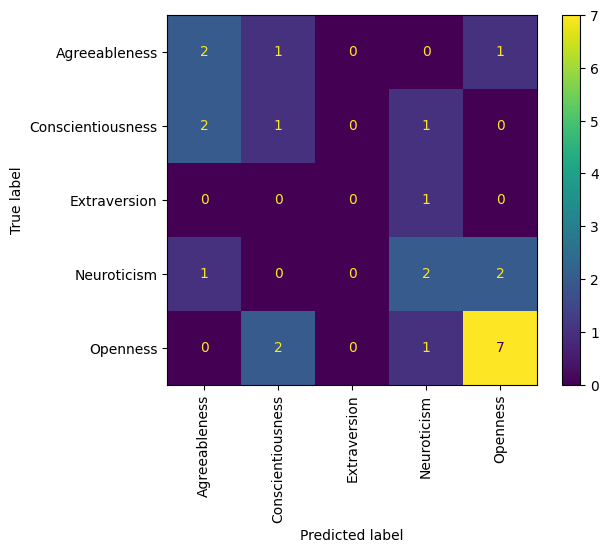

In [235]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(xticks_rotation='vertical')